**Навигация по уроку**
1. [Как создать нейро-сотрудника?](https://colab.research.google.com/drive/1lEGaSx8gJyKHzrqnptLv7JA9w85fo8fT)
2. [Практическая реализация нейро-сотрудника](https://colab.research.google.com/drive/1g9YfsQFqrKCLgz8POS0Cnhtt-d2-JCLm)
3. Домашняя работа

В домашней работе вам предстоит придумать своего нейро-сотрудника.
Подумайте над личными данными сотрудника, кто его целевая группа, какие услуги он оказывает или какие задачи он решает. Составьте промпт для него.

**Для получения 3 баллов** за задание достаточно использовать простую базу-знаний (плохо структурированный гугл документ, любого объема).

**Для 4-х баллов**, необходимо структурировать гугл документ. В этом вам поможет ChatGPT, надо его об этом "попросить". Подумайте, как это лучше сделать? Оставьте комментарии по этому поводу в колабе с домашней работой.

Задание считается выполненным, если на входе языковой модели подаются фрагменты из векторной базы-данных в виде:
```
Заголовок 1 уровня (логическое описание, тема к которой относиться фрагмент)
Заголовок 2 уровня (отражает смысл фрагмента или группы, в которую входит фрагмент)
Фрагмент (из первоначального текста, либо оптимизированный chatGPT)
```
**Подсказка**. Попробуйте посмотреть на данные и составить к ним двух-уровневый план.

**Для 5 баллов** проведите оптимизацию нейро-сотрудника и опишите в свободной форме в колабе с домашней работой, что и как вы делали, а главное для чего.

# Пояснение

Данная страница является второй версией оригинального проекта. ссылка проекта:

https://colab.research.google.com/drive/1CpT87uflhUfNgDSdrMsvCjWkXjCNVlPH#scrollTo=qYm8vKWigeu7

в нем предусматривалась удобная навигация но из предыдущей попытки я просто устал запускать по отдельности все компоненты. Так же там есть промежуточный итог и объяснение, зачем создана вторая версия. Тему работы перенес как есть. Реализован проект не до конца как указано в ТЗ, но доведен до работоспособного состояния без ошибок при выполнении.

# Тема работы

Некоторые размышления привели меня к мысли, что раз я изучаю нейросети, то было бы здорово иметь собственного помощника для систематизации моего пройденного курса и выполненных домашних заданий. Такой момент как раз представился в данном задании.

Стоит начать сразу с описания задуманного помощника, т.к. это является частью оптимизации проекта.

Предполагается, что ноутбук с домашней работой в colab создан как копия оригинального ноутбука с заданием, сохраняя в названии номер и текст "Домашняя работа".

Помощник будет спроектирован со следующими этапами, функциями и целями:

1) **Структурирование записей:**
- получение ссылок ноутбуков учетной записи в колабе:
    - авторизация на гугл драйв через API Google Colab Magic
    - запрос ноутбуков
- обработка каждой ссылки:
    - фильтрация блокнотов "untitled";
    - проверка поля "Владелец", чтобы определить, чей это ноутбук (колонка для развития проекта, т.к. в текущей версии видны только мои ноутбуки);
    - ~~проверка наличия текста "Домашняя работа" в названии  для выделения ноутбуков с домашними работами;~~
    - ~~проверка наличия заголовка "Итог" в теле ноутбука как индикатора завершенной работы. Данный заголовок в последующем стоит рассматривать как необходимый в домашних работах, т.к. этот проект может вырасти из статуса пет-проекта в полноценное приложение.~~
    - ~~если заголовок "Итог" отсутствует в блокноте домашней работы (см. пункт выше) - помечать блокнот как незаконченный.~~
    
    Обновлено:    
    - извлечение названия ноутбука;
    - извлечение навигации по уроку:
        - нахождение текста без ссылки в навигации к уроку и внесение его в колонку 'навигация';
    - извлечение всех заголовков ноутбука и внечение их в колонку 'Заголовки' в датафрейме;
    - извлечение текста после заголовка 'Итог', если такой имеется, если нет - отмечать его отстутствие, значение далее вносится в поле 'Итог' датафрейма;
   
- упорядочивание работ по номеру задания, которое берется из названия ноутбука;
- анализ кода в работах с помощью библиотеки ast:
    - извлечение классов;
    - извлечение функций;
    - передача в LLM класса/функции для получения краткого описания в виде
    ```
    Заголовок 1 уровня (Класс/Функция)
    Заголовок 2 уровня (логическая задача)
    Заголовок 3 уровня (краткое описание способа выполнения задачи)
    ```
     Предполагается использование LangChain для данного пункта.
     Для передачи в LLM сложных наборов классов/функций используется следующий метод:
        - 1. передача функций класса для получения описания
        - 2. получение описаний функций в классе от LLM
        - 3. передача в LLM класса с кратким описанием функций, полученных на предыдущем шаге
        - 4. получение описания класса
    - извлечение импортов;

- расчет хэша для ноутбуков;
- создание по итогу обработки найденных страниц из профиля документа-датафрейма с колонками:
    - 'ссылка': ссылка на ноутбук, метаданные в Chroma;
    - 'название': название ноутбука, документ в Chroma;
    - ~~задание;~~ ~~'навигация': название темы работы страницы из текстового блока навигации, документ в Chroma;~~
    - 'заголовки': текст заголовков любого уровня в уроке, документ в Chroma;
    - 'библиотеки': найденные импорты, метаданные в Chroma;
    - 'классы и функции': найденные классы и функции на странице, метаданные в Chroma;
    - 'описание': краткое описание от LLM классов и функций, документ в Chroma;
    - 'итог': итог выполненной работы, созданный из краткого описания текстового поля после заголовка "Итог" в работе, если такого поля нет - то так и добавляется значение "Нет", документ в Chroma;
    - 'хэш': хэш ноутбука, метаданные в Chroma.
- возможность сохранить и скачать документ локально в формате .csv и в гугл драйв по пути "/content/drive/MyDrive/assistant/database.csv".

2) **Создание векторной базы ChromaDB из структурированного документа:**
- создание базы из подготовленного датафрейма;
- индексирование документов в базе для последующего поиска;
- сохранение индексированной базы в гугл драйв пользователя с путем по умолчанию "/content/drive/MyDrive/assistant/chroma_db";
- загрузка индексов из гугл драйва для последующего использования.

3) **Создание ассистента для поиска данных в базе по запросам пользователя:**
- создать выбор моделей для работы ассистента;
- ассистент должен имееть функцию подсчета токенов через библиотеку tiktoken, необходимых для исполнения запроса к указанной модели;
- ассистент формирует запрос к выбранной LLM модели с параметрами:
    - промпт ассистента - поле с указанными параметрами по умолчанию с возможностью редактирования + найденные по схожести запроса пользователя документы в индексированной базе Chroma;
    - промпт запроса - поле с запросом пользователя;

4) **Создание интерфейса с использованием Gradio. Должен включать:**
- авторизацию в гугл драйв через всплывающее окно (временное решение, которое работает только при запуске в colab);
- поле с информацией об ассистенте:
    - название (тип) ассистента;
    - промпт ассистента;
- статус базы:
    - "не создана"/"создана"
    - поле для выбора пути для загрузки базы с указанным путем по умолчанию "/content/drive/MyDrive/assistant/chroma_db"
    - кнопка загрузки, которая подключает базу по указанному пути
    - статус меняется на "загружена", если использовалась успешная загрузка
    - статус меняется на "ошибка загрузки" при неудачной загрузке
- кнопка создания базы, если база не создана и не загружена
- область сохранения базы на локальное устройство:
    - поле с указанием пути до файла
    - кнопка сохранения: не активна, пока не существует датафрейма по пути гугл драйв (по умолчанию "/content/drive/MyDrive/assistant/database.csv")
    - кнопка сохранения: активна, когда файл по пути "/content/drive/MyDrive/assistant/database.csv" существует, либо указан путь к файлу.
- область запроса пользователя:
    - поле для ввода текста запроса с возможностью редактирования;
    - поле с ответом от ассистента:
        - ответ от LLM в текстовом виде
        - добавление метаданных из полей датафрейма, которые нашел ассистен в индексах: ссылка на ноутбук, название, задание, статус работы.
- область статистики:
    - количество использованных токенов в запросе
**Добавлено в процессе:**
- пргресс-бар от обработки до создания базы

**Возможные последующие доработки:**

Дообучение ассистента:
- возможность проверять драйв на появление новых ссылок ноутбуков и добавлять данные в датафрейм и векторную базу
- возможность изменять статус ноутбука
- возможность обновлять существующие записи при изменении ноутбука из базы (предположительно на основе изменения хэша ноутбуков)
    ...

## Эмбединги для OpenAI

*Небольшая справка по работе эмбединогов*

При использовании OpenAIEmbeddings в LangChain для кодирования текста в векторные представления (эмбеддинги) да, задействуется именно модель OpenAI, но не та, что генерирует текстовые ответы (например, GPT-4), а специализированные модели для эмбеддингов.

1. Какие модели используются?

OpenAI предоставляет отдельные embedding-модели, которые:

Оптимизированы для преобразования текста в векторы.

Не являются LLM (как GPT), но работают через тот же API.

Основные модели:

text-embedding-ada-002 (рекомендуемая, используется по умолчанию в LangChain).

Устаревшие: text-embedding-3-small, text-embedding-3-large.

2. Как это работает технически?

Отправка текста:

Ваш текст отправляется в API OpenAI embeddings, а не в chat/completions (как для GPT).
```
from langchain.embeddings import OpenAIEmbeddings
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")
vector = embeddings.embed_query("Пример текста")  # Возвращает список из 1536 чисел
```
Локальные вычисления:

Нет: Эмбеддинги вычисляются на серверах OpenAI, а не локально.

Словари/токенизаторы: OpenAI использует внутренние механизмы (например, BPE-токенизацию), но это скрыто от пользователя.

Отличие от LLM:

Эмбеддинг-модели не генерируют текст, а только преобразуют его в векторы.

Они дешевле и быстрее, чем GPT (text-embedding-ada-002 стоит $0.0001/1K токенов).

# Код проекта

Прошу прощения, что основная ячейка целиком исполняется, без разделений и удобной навигации, но из предыдущей попытки я просто устал запускать по отдельности все компоненты.

In [ ]:
#######################
#УСТАНОВКА ЗАВИСИМОСТЕЙ
#######################

!pip install -q openai gradio tiktoken langchain langchain-openai langchain-community chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 4.6 MB/s eta 0:00:00


In [ ]:
#######################
# ИМПОРТЫ
#######################

import os
import shutil
import ast
import json
import logging
import pandas as pd
import gradio as gr
import tiktoken
from typing import List, Dict, Any, Optional, Tuple
from datetime import datetime
from io import StringIO

#Google Colab
from google.colab import auth, drive, files
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError

#LangChain
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains import RetrievalQA
from langchain.schema import Document

In [ ]:
#######################
# НАСТРОЙКА ЛОГИРОВАНИЯ
#######################

class LogHandler:
    """Обработчик логов для отображения в интерфейсе"""

    def __init__(self):
        self.logs = []
        self.setup_logging()

    def setup_logging(self):
        """Настройка системы логирования"""
        logging.basicConfig(
            level=logging.INFO,
            format='%(asctime)s - %(levelname)s - %(message)s',
            handlers=[logging.StreamHandler()]
        )
        self.logger = logging.getLogger(__name__)

    def log(self, message: str, level: str = "INFO"):
        """Добавление лога"""
        timestamp = datetime.now().strftime("%H:%M:%S")
        log_entry = f"[{timestamp}] {level}: {message}"
        self.logs.append(log_entry)

        if level == "ERROR":
            self.logger.error(message)
        elif level == "WARNING":
            self.logger.warning(message)
        else:
            self.logger.info(message)

    def get_logs(self) -> str:
        """Получение всех логов"""
        return "\n".join(self.logs[-50:])  # Последние 50 записей

    def clear_logs(self):
        """Очистка логов"""
        self.logs.clear()

#######################
# МОДУЛЬ РАБОТЫ С GOOGLE COLAB API
#######################

class ColabNotebookManager:
    """Менеджер для работы с ноутбуками Google Colab"""

    def __init__(self, log_handler: LogHandler):
        self.log_handler = log_handler
        self.service = None
        self.user_email = None

    def authenticate(self) -> bool:
        """Аутентификация в Google API"""
        try:
            self.log_handler.log("Начало аутентификации в Google API")
            auth.authenticate_user()
            self.service = build('drive', 'v3')

            # Получаем email пользователя
            about = self.service.about().get(fields='user').execute()
            self.user_email = about['user']['emailAddress']

            self.log_handler.log(f"Аутентификация успешна. Пользователь: {self.user_email}")
            return True

        except Exception as e:
            self.log_handler.log(f"Ошибка аутентификации: {str(e)}", "ERROR")
            return False

    def get_notebooks(self) -> List[Dict[str, Any]]:
        """Получение списка ноутбуков пользователя"""
        try:
            self.log_handler.log("Поиск ноутбуков пользователя")

            query = "(mimeType='application/vnd.google.colaboratory' or mimeType='application/x-ipynb+json')"
            results = self.service.files().list(
                q=query,
                fields="files(id, name, webViewLink, owners)"
            ).execute()

            notebooks = []
            for file in results.get('files', []):
                # Фильтрация untitled и не принадлежащих пользователю
                if 'untitled' in file['name'].lower():
                    continue

                # Проверка владельца
                is_owner = any(
                    owner.get('emailAddress') == self.user_email
                    for owner in file.get('owners', [])
                )

                if is_owner:
                    notebooks.append({
                        'id': file['id'],
                        'name': file['name'],
                        'link': file['webViewLink']
                    })

            self.log_handler.log(f"Найдено {len(notebooks)} подходящих ноутбуков")
            return notebooks

        except Exception as e:
            self.log_handler.log(f"Ошибка получения ноутбуков: {str(e)}", "ERROR")
            return []


    def get_notebook_content(self, notebook_id: str) -> Optional[Dict]:
        """Получение содержимого ноутбука в формате JSON"""
        try:
            self.log_handler.log(f"Загрузка содержимого ноутбука {notebook_id}")

            file_metadata = self.service.files().get(fileId=notebook_id, fields='mimeType').execute()
            mime_type = file_metadata.get('mimeType')

            if mime_type == 'application/vnd.google.colaboratory':
                # Попытка экспорта Colab файла
                try:
                    content = self.service.files().export(
                        fileId=notebook_id,
                        mimeType='application/x-ipynb+json'
                    ).execute()
                    return json.loads(content.decode('utf-8'))
                except HttpError as export_error:
                    if export_error.resp.status == 403:
                        # Если экспорт недоступен, пытаемся скачать как обычный файл
                        self.log_handler.log(f"Экспорт недоступен для {notebook_id}, пытаемся альтернативный способ", "WARNING")
                        try:
                            content = self.service.files().get_media(fileId=notebook_id).execute()
                            return json.loads(content.decode('utf-8'))
                        except:
                            # Последняя попытка - создать копию и экспортировать её
                            self.log_handler.log(f"Создаем временную копию файла {notebook_id}", "INFO")
                            copy_metadata = {'name': f'temp_copy_{notebook_id}'}
                            copied_file = self.service.files().copy(
                                fileId=notebook_id,
                                body=copy_metadata
                            ).execute()

                            try:
                                content = self.service.files().export(
                                    fileId=copied_file['id'],
                                    mimeType='application/x-ipynb+json'
                                ).execute()

                                # Удаляем временную копию
                                self.service.files().delete(fileId=copied_file['id']).execute()

                                return json.loads(content.decode('utf-8'))
                            except:
                                # Удаляем временную копию в случае ошибки
                                self.service.files().delete(fileId=copied_file['id']).execute()
                                raise
                    else:
                        raise export_error
            else:
                # Для обычных .ipynb файлов
                content = self.service.files().get_media(fileId=notebook_id).execute()
                return json.loads(content.decode('utf-8'))

        except HttpError as e:
            if e.resp.status == 403:
                self.log_handler.log(f"Нет доступа к ноутбуку {notebook_id}, пропускаем", "WARNING")
            else:
                self.log_handler.log(f"HTTP ошибка загрузки ноутбука {notebook_id}: {str(e)}", "ERROR")
            return None
        except Exception as e:
            self.log_handler.log(f"Ошибка загрузки ноутбука {notebook_id}: {str(e)}", "ERROR")
            return None


#######################
# МОДУЛЬ АНАЛИЗА КОДА
#######################

class CodeAnalyzer:
    """Анализатор кода Python"""

    def __init__(self, log_handler: LogHandler):
        self.log_handler = log_handler

    def extract_imports(self, code: str) -> List[str]:
        """Извлечение импортов из кода"""
        try:
            tree = ast.parse(code)
            imports = []

            for node in ast.walk(tree):
                if isinstance(node, ast.Import):
                    for alias in node.names:
                        imports.append(alias.name)
                elif isinstance(node, ast.ImportFrom):
                    module = node.module or ''
                    for alias in node.names:
                        imports.append(f"{module}.{alias.name}" if module else alias.name)

            return list(set(imports))

        except SyntaxError:
            return []
        except Exception as e:
            self.log_handler.log(f"Ошибка анализа импортов: {str(e)}", "WARNING")
            return []

    def extract_functions_and_classes(self, code: str) -> Dict[str, List[Dict]]:
        """Извлечение функций и классов из кода"""
        try:
            tree = ast.parse(code)
            functions = []
            classes = []

            # Сначала найдем все классы для проверки вложенности
            class_nodes = [node for node in ast.walk(tree) if isinstance(node, ast.ClassDef)]

            for node in ast.walk(tree):
                if isinstance(node, ast.FunctionDef):
                    # Проверяем, что функция не внутри класса
                    is_inside_class = False
                    for class_node in class_nodes:
                        if node in class_node.body:
                            is_inside_class = True
                            break

                    if not is_inside_class:
                        try:
                            functions.append({
                                'name': node.name,
                                'code': ast.unparse(node) if hasattr(ast, 'unparse') else f"def {node.name}(...): ...",
                                'type': 'function'
                            })
                        except:
                            functions.append({
                                'name': node.name,
                                'code': f"def {node.name}(...): ...",
                                'type': 'function'
                            })

                elif isinstance(node, ast.ClassDef):
                    methods = []
                    for item in node.body:
                        if isinstance(item, ast.FunctionDef):
                            try:
                                methods.append({
                                    'name': item.name,
                                    'code': ast.unparse(item) if hasattr(ast, 'unparse') else f"def {item.name}(...): ...",
                                    'type': 'method'
                                })
                            except:
                                methods.append({
                                    'name': item.name,
                                    'code': f"def {item.name}(...): ...",
                                    'type': 'method'
                                })

                    try:
                        class_code = ast.unparse(node) if hasattr(ast, 'unparse') else f"class {node.name}: ..."
                    except:
                        class_code = f"class {node.name}: ..."

                    classes.append({
                        'name': node.name,
                        'code': class_code,
                        'methods': methods,
                        'type': 'class'
                    })

            return {'functions': functions, 'classes': classes}

        except SyntaxError:
            return {'functions': [], 'classes': []}
        except Exception as e:
            self.log_handler.log(f"Ошибка анализа функций и классов: {str(e)}", "WARNING")
            return {'functions': [], 'classes': []}

#######################
# МОДУЛЬ ОБРАБОТКИ НОУТБУКОВ
#######################

class NotebookProcessor:
    """Процессор для анализа ноутбуков"""

    def __init__(self, log_handler: LogHandler):
        self.log_handler = log_handler
        self.code_analyzer = CodeAnalyzer(log_handler)

    def extract_headers(self, cells: List[Dict]) -> List[str]:
        """Извлечение заголовков из ячеек markdown"""
        headers = []

        for cell in cells:
            if cell.get('cell_type') == 'markdown':
                source = ''.join(cell.get('source', []))
                lines = source.split('\n')

                for line in lines:
                    line = line.strip()
                    if line.startswith('#'):
                        # Очистка заголовка от лишних символов
                        header = line.lstrip('#').strip()
                        if header:
                            headers.append(header)

        return headers

    def extract_conclusion(self, cells: List[Dict]) -> str:
        """Извлечение текста после заголовка 'Итог'"""
        conclusion_found = False
        conclusion_text = []

        for cell in cells:
            if cell.get('cell_type') == 'markdown':
                source = ''.join(cell.get('source', []))
                lines = source.split('\n')

                for line in lines:
                    line_clean = line.strip().lower()
                    if line_clean.startswith('#') and 'итог' in line_clean:
                        conclusion_found = True
                        continue

                    if conclusion_found:
                        if line.strip().startswith('#'):
                            # Новый заголовок - прекращаем сбор
                            break
                        conclusion_text.append(line)

        result = '\n'.join(conclusion_text).strip()
        return result if result else "Нет итога"

    def extract_code_elements(self, cells: List[Dict]) -> Tuple[List[str], Dict]:
        """Извлечение импортов, функций и классов из кода"""
        all_imports = []
        all_code_elements = {'functions': [], 'classes': []}

        for cell in cells:
            if cell.get('cell_type') == 'code':
                source = ''.join(cell.get('source', []))

                # Очистка от магических команд
                lines = source.split('\n')
                clean_lines = []
                for line in lines:
                    if not line.strip().startswith(('!', '%', '?')):
                        clean_lines.append(line)

                clean_code = '\n'.join(clean_lines)

                if clean_code.strip():
                    # Извлечение импортов
                    imports = self.code_analyzer.extract_imports(clean_code)
                    all_imports.extend(imports)

                    # Извлечение функций и классов
                    code_elements = self.code_analyzer.extract_functions_and_classes(clean_code)
                    all_code_elements['functions'].extend(code_elements['functions'])
                    all_code_elements['classes'].extend(code_elements['classes'])

        return list(set(all_imports)), all_code_elements

    def process_notebook(self, notebook_data: Dict, notebook_info: Dict) -> Dict:
        """Обработка одного ноутбука"""
        try:
            self.log_handler.log(f"Обработка ноутбука: {notebook_info['name']}")

            cells = notebook_data.get('cells', [])

            # Извлечение данных
            headers = self.extract_headers(cells)
            conclusion = self.extract_conclusion(cells)
            imports, code_elements = self.extract_code_elements(cells)

            # Формирование списка функций и классов
            functions_and_classes = []
            for func in code_elements['functions']:
                functions_and_classes.append(f"Функция: {func['name']}")
            for cls in code_elements['classes']:
                functions_and_classes.append(f"Класс: {cls['name']}")

            result = {
                'ссылка': notebook_info['link'],
                'название': notebook_info['name'],
                'заголовки': '; '.join(headers) if headers else 'нет заголовков',
                'библиотеки': ', '.join(imports) if imports else 'нет импортов',
                'классы и функции': '; '.join(functions_and_classes) if functions_and_classes else 'нет функций',
                'описание': '',  # Будет заполнено LLM
                'итог': conclusion,
                'code_elements': code_elements  # Для передачи в LLM
            }

            self.log_handler.log(f"Ноутбук {notebook_info['name']} обработан успешно")
            return result

        except Exception as e:
            self.log_handler.log(f"Ошибка обработки ноутбука {notebook_info['name']}: {str(e)}", "ERROR")
            return None

#######################
# МОДУЛЬ РАБОТЫ С LLM
#######################

class LLMProcessor:
    """Процессор для работы с языковой моделью"""

    def __init__(self, api_key: str, endpoint: str, log_handler: LogHandler):
        self.log_handler = log_handler
        self.llm = ChatOpenAI(
            openai_api_key=api_key,
            openai_api_base=endpoint,
            temperature=0.3,
            model_name="gpt-4.1-nano"
        )
        self.encoding = tiktoken.get_encoding("cl100k_base")

    def count_tokens(self, text: str) -> int:
        """Подсчет токенов в тексте"""
        return len(self.encoding.encode(text))

    def describe_code_element(self, element: Dict) -> str:
        """Получение описания элемента кода от LLM"""
        try:
            element_type = element.get('type', 'function')
            element_name = element.get('name', 'unknown')
            element_code = element.get('code', '')

            prompt = f"""
Проанализируй следующий код {element_type} '{element_name}' и опиши его в формате:

{element_name}
Логическая задача
Краткое описание способа выполнения задачи

Код:
python
{element_code}

Ответ должен быть структурированным и кратким.
"""

            response = self.llm.invoke(prompt)
            self.log_handler.log(f"Получено описание для {element_type} {element_name}")

            return response.content.strip()

        except Exception as e:
            self.log_handler.log(f"Ошибка получения описания от LLM: {str(e)}", "ERROR")
            return f"Ошибка описания {element.get('name', 'unknown')}"

    def describe_class_with_methods(self, class_element: Dict) -> str:
        """Получение описания класса с методами"""
        try:
            class_name = class_element.get('name', 'unknown')
            methods = class_element.get('methods', [])

            # Сначала получаем описания методов
            method_descriptions = []
            for method in methods:
                method_desc = self.describe_code_element(method)
                method_descriptions.append(method_desc)

            # Затем описываем весь класс
            methods_summary = '\n'.join([f"- {method['name']}" for method in methods])

            prompt = f"""
Проанализируй класс '{class_name}' с методами и опиши его в формате:

{class_name}
Логическая задача
Краткое описание способа выполнения задачи

Методы класса:
{methods_summary}

Описания методов:
{chr(10).join(method_descriptions)}

Дай общее описание класса и его назначения.
"""

            response = self.llm.invoke(prompt)
            self.log_handler.log(f"Получено описание для класса {class_name}")

            return response.content.strip()

        except Exception as e:
            self.log_handler.log(f"Ошибка получения описания класса от LLM: {str(e)}", "ERROR")
            return f"Ошибка описания класса {class_element.get('name', 'unknown')}"

    def process_notebook_descriptions(self, notebook_data: Dict) -> str:
        """Обработка всех элементов кода в ноутбуке"""
        try:
            code_elements = notebook_data.get('code_elements', {'functions': [], 'classes': []})
            descriptions = []

            # Обработка функций
            for function in code_elements['functions']:
                desc = self.describe_code_element(function)
                descriptions.append(desc)

            # Обработка классов
            for class_element in code_elements['classes']:
                desc = self.describe_class_with_methods(class_element)
                descriptions.append(desc)

            return '\n\n'.join(descriptions) if descriptions else 'Нет описаний'

        except Exception as e:
            self.log_handler.log(f"Ошибка обработки описаний: {str(e)}", "ERROR")
            return 'Ошибка обработки описаний'

#######################
# МОДУЛЬ РАБОТЫ С ВЕКТОРНОЙ БАЗОЙ
#######################

class ChromaManager:
    """Менеджер для работы с векторной базой Chroma"""

    def __init__(self, api_key: str, endpoint: str, log_handler: LogHandler):
        self.log_handler = log_handler

        # ИЗМЕНЕНО: добавлен endpoint для embeddings
        self.embeddings = OpenAIEmbeddings(
            openai_api_key=api_key,
            openai_api_base=endpoint,
            model="text-embedding-3-small"  # ИЗМЕНЕНО: используем text-embedding-3-small
        )

        self.vectorstore = None
        self.qa_chain = None
        self.api_key = api_key
        self.endpoint = endpoint

        # ИЗМЕНЕНО: используем cl100k_base токенизатор
        self.encoding = tiktoken.get_encoding("cl100k_base")

    def create_vectorstore(self, df: pd.DataFrame) -> bool:
        """Создание векторной базы из датафрейма"""
        try:
            self.log_handler.log("Создание векторной базы Chroma")

            documents = []
            metadatas = []

            for _, row in df.iterrows():
                # Документы для Chroma (текстовые данные)
                doc_content = f"""
Название: {row['название']}
Заголовки: {row['заголовки']}
Описание: {row['описание']}
Итог: {row['итог']}
"""

                # Метаданные для Chroma
                metadata = {
                    'ссылка': row['ссылка'],
                    'библиотеки': row['библиотеки'],
                    'классы и функции': row['классы и функции']
                }

                documents.append(Document(page_content=doc_content, metadata=metadata))

            # Создание векторной базы
            self.vectorstore = Chroma.from_documents(
                documents=documents,
                embedding=self.embeddings,
                persist_directory="./chroma_db"
            )

            # Исоздание QA цепочки с ChatOpenAI
            self.qa_chain = RetrievalQA.from_chain_type(
                llm=ChatOpenAI(
                    openai_api_key=self.api_key,
                    openai_api_base=self.endpoint,
                    temperature=0.3,
                    model_name="gpt-4.1-nano"
                ),
                chain_type="stuff",
                retriever=self.vectorstore.as_retriever(search_kwargs={"k": 3}),
                return_source_documents=True
            )

            self.log_handler.log(f"Векторная база создана с {len(documents)} документами")
            return True

        except Exception as e:
            self.log_handler.log(f"Ошибка создания векторной базы: {str(e)}", "ERROR")
            return False

    def query(self, question: str) -> Tuple[str, int, List[str]]:
        """Запрос к векторной базе"""
        try:
            if not self.qa_chain:
                return "Векторная база не создана", 0, []

            self.log_handler.log(f"Обработка запроса: {question}")

            # Подсчет токенов в запросе
            input_tokens = len(self.encoding.encode(question))

            # Выполнение запроса
            result = self.qa_chain({"query": question})

            # Подсчет токенов в ответе
            output_tokens = len(self.encoding.encode(result['result']))
            total_tokens = input_tokens + output_tokens

            # Извлечение ссылок из источников
            links = []
            for doc in result.get('source_documents', []):
                link = doc.metadata.get('ссылка')
                if link and link not in links:
                    links.append(link)

            self.log_handler.log(f"Запрос обработан. Использовано токенов: {total_tokens}")

            return result['result'], total_tokens, links

        except Exception as e:
            self.log_handler.log(f"Ошибка обработки запроса: {str(e)}", "ERROR")
            return f"Ошибка: {str(e)}", 0, []

#######################
# ГЛАВНЫЙ КЛАСС ПРИЛОЖЕНИЯ
#######################

class NotebookAssistant:
    """Главный класс ассистента обработки ноутбуков"""

    def __init__(self):
        self.log_handler = LogHandler()
        self.colab_manager = ColabNotebookManager(self.log_handler)
        self.notebook_processor = NotebookProcessor(self.log_handler)
        self.llm_processor = None
        self.chroma_manager = None
        self.df = None
        self.api_key = None
        self.endpoint = None

    def set_api_key(self, api_key: str, endpoint: str) -> str:
        """Установка API ключа и endpoint OpenAI"""
        try:
            self.api_key = api_key
            self.endpoint = endpoint
            self.llm_processor = LLMProcessor(api_key, endpoint, self.log_handler)
            self.chroma_manager = ChromaManager(api_key, endpoint, self.log_handler)
            self.log_handler.log("API ключ и endpoint установлены успешно")
            return "API ключ и endpoint установлены успешно"
        except Exception as e:
            self.log_handler.log(f"Ошибка установки API ключа: {str(e)}", "ERROR")
            return f"Ошибка: {str(e)}"

    def get_data(self) -> Tuple[str, str]:
        """Получение и обработка данных из ноутбуков"""
        try:
            if not self.api_key:
                return "Сначала установите API ключ OpenAI", self.log_handler.get_logs()

            self.log_handler.clear_logs()
            self.log_handler.log("Начало обработки ноутбуков")

            # Аутентификация
            if not self.colab_manager.authenticate():
                return "Ошибка аутентификации", self.log_handler.get_logs()

            # Получение ноутбуков
            notebooks = self.colab_manager.get_notebooks()
            if not notebooks:
                return "Подходящие ноутбуки не найдены", self.log_handler.get_logs()

            # Обработка ноутбуков
            processed_data = []
            for notebook in notebooks:
                self.log_handler.log(f"Загрузка ноутбука: {notebook['name']}")

                notebook_content = self.colab_manager.get_notebook_content(notebook['id'])
                if notebook_content:
                    processed_notebook = self.notebook_processor.process_notebook(
                        notebook_content, notebook
                    )

                    if processed_notebook:
                        # Получение описаний от LLM
                        self.log_handler.log(f"Получение описаний от LLM для: {notebook['name']}")
                        description = self.llm_processor.process_notebook_descriptions(processed_notebook)
                        processed_notebook['описание'] = description

                        # Удаляем временные данные
                        del processed_notebook['code_elements']
                        processed_data.append(processed_notebook)

            # Создание датафрейма
            self.df = pd.DataFrame(processed_data)

            self.log_handler.log(f"Обработка завершена. Создан датафрейм с {len(self.df)} записями")

            return f"Успешно обработано {len(self.df)} ноутбуков", self.log_handler.get_logs()

        except Exception as e:
            self.log_handler.log(f"Критическая ошибка: {str(e)}", "ERROR")
            return f"Ошибка: {str(e)}", self.log_handler.get_logs()

    def download_dataframe(self) -> Tuple[str, Optional[str]]:
        """Скачивание датафрейма"""
        try:
            if self.df is None:
                return "Сначала получите данные", None

            filename = f"notebooks_data_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
            filepath = f"/content/{filename}"
            self.df.to_csv(filepath, index=False, encoding='utf-8')

            self.log_handler.log(f"Датафрейм сохранен: {filename}")
            return f"Файл {filename} готов к скачиванию", filepath

        except Exception as e:
            self.log_handler.log(f"Ошибка скачивания: {str(e)}", "ERROR")
            return f"Ошибка: {str(e)}", None

    def load_dataframe(self, file_path: str) -> str:
        """Загрузка датафрейма из файла"""
        try:
            if not file_path:
                return "Файл не выбран"

            self.df = pd.read_csv(file_path, encoding='utf-8')
            self.log_handler.log(f"Датафрейм загружен из {file_path}")
            return f"Датафрейм загружен успешно. Записей: {len(self.df)}"

        except Exception as e:
            self.log_handler.log(f"Ошибка загрузки датафрейма: {str(e)}", "ERROR")
            return f"Ошибка: {str(e)}"

    def save_vectorstore(self) -> str:
        """Сохранение векторной базы"""
        try:
            if not self.chroma_manager or not self.chroma_manager.vectorstore:
                return "Векторная база не создана"

            # Chroma автоматически сохраняется в persist_directory
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            backup_dir = f"/content/chroma_backup_{timestamp}"

            import shutil
            shutil.copytree("./chroma_db", backup_dir)

            self.log_handler.log(f"Векторная база сохранена в {backup_dir}")
            return f"База сохранена в {backup_dir}"

        except Exception as e:
            self.log_handler.log(f"Ошибка сохранения базы: {str(e)}", "ERROR")
            return f"Ошибка: {str(e)}"

    def load_vectorstore(self, backup_dir: str) -> str:
        """Загрузка векторной базы"""
        try:
            if not backup_dir:
                return "Папка не выбрана"

            if not self.chroma_manager:
                return "Сначала установите API ключ"

            # Удаляем старую базу если есть
            if os.path.exists("./chroma_db"):
                shutil.rmtree("./chroma_db")

            # Копируем загруженную базу
            shutil.copytree(backup_dir, "./chroma_db")

            # Переинициализируем векторную базу
            self.chroma_manager.vectorstore = Chroma(
                persist_directory="./chroma_db",
                embedding_function=self.chroma_manager.embeddings
            )

            # Создание QA цепочки
            from langchain_openai import ChatOpenAI
            self.chroma_manager.qa_chain = RetrievalQA.from_chain_type(
                llm=ChatOpenAI(
                    openai_api_key=self.chroma_manager.api_key,
                    openai_api_base=self.chroma_manager.endpoint,
                    temperature=0.3,
                    model_name="gpt-4.1-nano"
                ),
                chain_type="stuff",
                retriever=self.chroma_manager.vectorstore.as_retriever(search_kwargs={"k": 3}),
                return_source_documents=True
            )

            self.log_handler.log(f"Векторная база загружена из {backup_dir}")
            return "База загружена успешно"

        except Exception as e:
            self.log_handler.log(f"Ошибка загрузки базы: {str(e)}", "ERROR")
            return f"Ошибка: {str(e)}"


    def create_vectorstore(self) -> Tuple[str, str]:
        """Создание векторной базы"""
        try:
            if self.df is None:
                return "Сначала получите данные", self.log_handler.get_logs()

            if not self.chroma_manager:
                return "API ключ не установлен", self.log_handler.get_logs()

            success = self.chroma_manager.create_vectorstore(self.df)

            if success:
                return "Векторная база создана успешно", self.log_handler.get_logs()
            else:
                return "Ошибка создания векторной базы", self.log_handler.get_logs()

        except Exception as e:
            self.log_handler.log(f"Ошибка создания базы: {str(e)}", "ERROR")
            return f"Ошибка: {str(e)}", self.log_handler.get_logs()

    def query_assistant(self, question: str) -> Tuple[str, str, str]:
        """Запрос к ассистенту"""
        try:
            if not self.chroma_manager or not self.chroma_manager.qa_chain:
                return "Векторная база не создана", "", self.log_handler.get_logs()

            answer, tokens, links = self.chroma_manager.query(question)

            # Форматирование ответа
            response = f"{answer}\n\n"
            if links:
                response += "Ссылки на ноутбуки:\n"
                for i, link in enumerate(links, 1):
                    response += f"{i}. {link}\n"

            token_info = f"Использовано токенов: {tokens}"

            return response, token_info, self.log_handler.get_logs()

        except Exception as e:
            self.log_handler.log(f"Ошибка запроса: {str(e)}", "ERROR")
            return f"Ошибка: {str(e)}", "", self.log_handler.get_logs()

#######################
# ИНТЕРФЕЙС GRADIO
#######################

def create_interface():
    """Создание интерфейса Gradio"""

    assistant = NotebookAssistant()

    with gr.Blocks(title="Ассистент обработки ноутбуков") as interface:
        gr.Markdown("# 🤖 Ассистент обработки ноутбуков Google Colab")
        gr.Markdown("Анализирует ваши ноутбуки и создает векторную базу для поиска")

        with gr.Tab("⚙️ Настройка"):
            api_key_input = gr.Textbox(
                label="OpenAI API Key",
                type="password",
                placeholder="sk-..."
            )
            endpoint_input = gr.Textbox(
                label="OpenAI Endpoint",
                placeholder="https://api.openai.com/v1",
                value="https://api.openai.com/v1"
            )
            api_key_btn = gr.Button("Установить настройки")
            api_key_output = gr.Textbox(label="Статус", interactive=False)

            api_key_btn.click(
                assistant.set_api_key,
                inputs=[api_key_input, endpoint_input],
                outputs=[api_key_output]
            )

        with gr.Tab("📊 Обработка данных"):
            with gr.Row():
                get_data_btn = gr.Button("Получить данные", variant="primary")
                create_db_btn = gr.Button("Создать базу", variant="secondary")

            with gr.Row():
                with gr.Column():
                    gr.Markdown("### Датафрейм")
                    download_btn = gr.Button("Скачать датафрейм")
                    download_file = gr.File(label="Скачать файл", visible=False)
                    upload_df = gr.File(label="Загрузить датафрейм (.csv)", file_types=[".csv"])
                    load_df_btn = gr.Button("Загрузить датафрейм")

                with gr.Column():
                    gr.Markdown("### Векторная база")
                    save_db_btn = gr.Button("Сохранить базу")
                    upload_db = gr.File(label="Загрузить базу (папка)", file_count="directory")
                    load_db_btn = gr.Button("Загрузить базу")

            status_output = gr.Textbox(label="Статус операции", interactive=False)
            logs_output = gr.Textbox(
                label="Логи выполнения",
                lines=10,
                interactive=False
            )

            # Обработчики событий
            get_data_btn.click(
                assistant.get_data,
                outputs=[status_output, logs_output]
            )

            def handle_download(assistant_ref):
                status, filepath = assistant_ref.download_dataframe()
                if filepath:
                    return status, gr.update(value=filepath, visible=True)
                return status, gr.update(visible=False)

            download_btn.click(
                lambda: handle_download(assistant),
                outputs=[status_output, download_file]
            )

            load_df_btn.click(
                lambda file: assistant.load_dataframe(file.name if file else ""),
                inputs=[upload_df],
                outputs=[status_output]
            )

            create_db_btn.click(
                assistant.create_vectorstore,
                outputs=[status_output, logs_output]
            )

            save_db_btn.click(
                assistant.save_vectorstore,
                outputs=[status_output]
            )

            load_db_btn.click(
                lambda file: assistant.load_vectorstore(file.name if file else ""),
                inputs=[upload_db],
                outputs=[status_output]
            )


        with gr.Tab("🔍 Поиск"):
            question_input = gr.Textbox(
                label="Ваш вопрос",
                placeholder="Например: Найди ноутбуки с обработкой данных",
                lines=2
            )
            search_btn = gr.Button("Найти", variant="primary")

            answer_output = gr.Textbox(
                label="Ответ",
                lines=10,
                interactive=False
            )
            tokens_output = gr.Textbox(label="Использовано токенов", interactive=False)
            search_logs_output = gr.Textbox(
                label="Логи поиска",
                lines=5,
                interactive=False
            )

            search_btn.click(
                assistant.query_assistant,
                inputs=[question_input],
                outputs=[answer_output, tokens_output, search_logs_output]
            )

    return interface

#######################
# ЗАПУСК ПРИЛОЖЕНИЯ
#######################

if __name__ == "__main__":
    # Создание и запуск интерфейса
    interface = create_interface()
    interface.launch(
        share=True,
        debug=True,
        server_name="0.0.0.0",
        server_port=7860
    )

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://17f9fb1fb02ec04068.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Интерфейс
(служит для якоря быстрой перемотки в конец кода)

# Проверка данных

In [ ]:
saved_df = pd.read_csv('./notebooks_data_20250617_171550.csv') # созданный после обработки фрейм

In [ ]:
saved_df

,ссылка,название,заголовки,библиотеки,классы и функции,описание,итог
0,https://colab.research.google.com/drive/1AOTAt...,28.3 проект ассистента.ipynb,начало; интерфейс,"google.colab.auth, json, os, typing.List, pand...",Функция: create_interface; Класс: LogHandler; ...,create_interface \nЛогическая задача \nСозда...,Нет итога
1,https://colab.research.google.com/drive/1CpT87...,"Копия блокнота ""28.3. Домашняя работа""",Тема работы; Эмбединги для OpenAI; Каркас с за...,"google.colab.auth, json, os, typing.List, pand...",Функция: get_api_key; Функция: check_drive_aut...,get_api_key \nЛогическая задача \nПолучить A...,Нет итога
2,https://colab.research.google.com/drive/11GlDy...,"Терновцев ""4.4. Дополнительные задачи по Pyth...",Рекурсия; Пример 1. Суммирование целых чисел; ...,нет импортов,Функция: sum_to; Функция: fib; Функция: sum_in...,sum_to \nЛогическая задача \nРекурсивное выч...,Нет итога
3,https://colab.research.google.com/drive/14YaJm...,regression-automarket-22.3.ipynb,Кодируем числовые параметры,"numpy, pandas, keras.utils, matplotlib.pyplot",Функция: range2OHE,range2OHE \nЛогическая задача \nОпределение ...,Нет итога
4,https://colab.research.google.com/drive/1DCVwy...,"Копия блокнота ""regression-automarket-22.3.ipynb""",Кодируем числовые параметры; Разделим сет на о...,"keras.layers.Dense, sklearn.model_selection.tr...",Функция: range2OHE; Функция: param2SOHE; Функц...,range2OHE \nЛогическая задача \nПреобразован...,В данном задании лучшие результаты показала мо...
5,https://colab.research.google.com/drive/19L78D...,ТГ Квиз Бот,Оригинал кода бота; Доработка; Запрашиваем из ...,"aiogram.F, aiogram.utils.keyboard.InlineKeyboa...",Функция: generate_options_keyboard; Функция: g...,generate_options_keyboard \nЛогическая задача...,Нет итога
6,https://colab.research.google.com/drive/1XerlM...,"Копия блокнота ""16.3. Домашняя работа""",Описание cv2.ellipse; Добавим выделение глаз; ...,"gdown, numpy, cv2, matplotlib.pyplot",Функция: blur_face; Функция: blur_face,blur_face \nЛогическая задача \nЗадача — раз...,"Выполнили все поставленные задачи: нашли лицо,..."
7,https://colab.research.google.com/drive/1H5-BH...,"Копия блокнота ""8.3. Домашняя работа""",Итог,"os, plotly.io, numpy, pandas, plotly.graph_obj...",нет функций,Нет описаний,Создали и вывели временные графики SMA и BB дл...
8,https://colab.research.google.com/drive/1jixVj...,streamlit и PasAgrClass спам фильтр инференс +...,Определение модели; Создание и начальное обуче...,"re.X, os, sklearn.model_selection.train_test_s...",Функция: preprocess; Функция: augment_text; Фу...,preprocess \nЛогическая задача \nУдаление зн...,Создали и обучили модель Passive Aggressive Cl...
9,https://colab.research.google.com/drive/1sJEQ3...,"26.4 FastAPI/REST API надстройка к ""21.4 Домаш...",Создание модели; Проверка на стороннем тексте;...,"razdel.tokenize, keras.layers.Dense, fastapi.U...",Функция: filtered_tokens; Функция: seq_split; ...,filtered_tokens \nЛогическая задача \nИзвлеч...,Наша модель распознала тестовые тексты 5 русск...


Пример выполенния обработки ноутбуков вместе с логами и запросов ассистенту

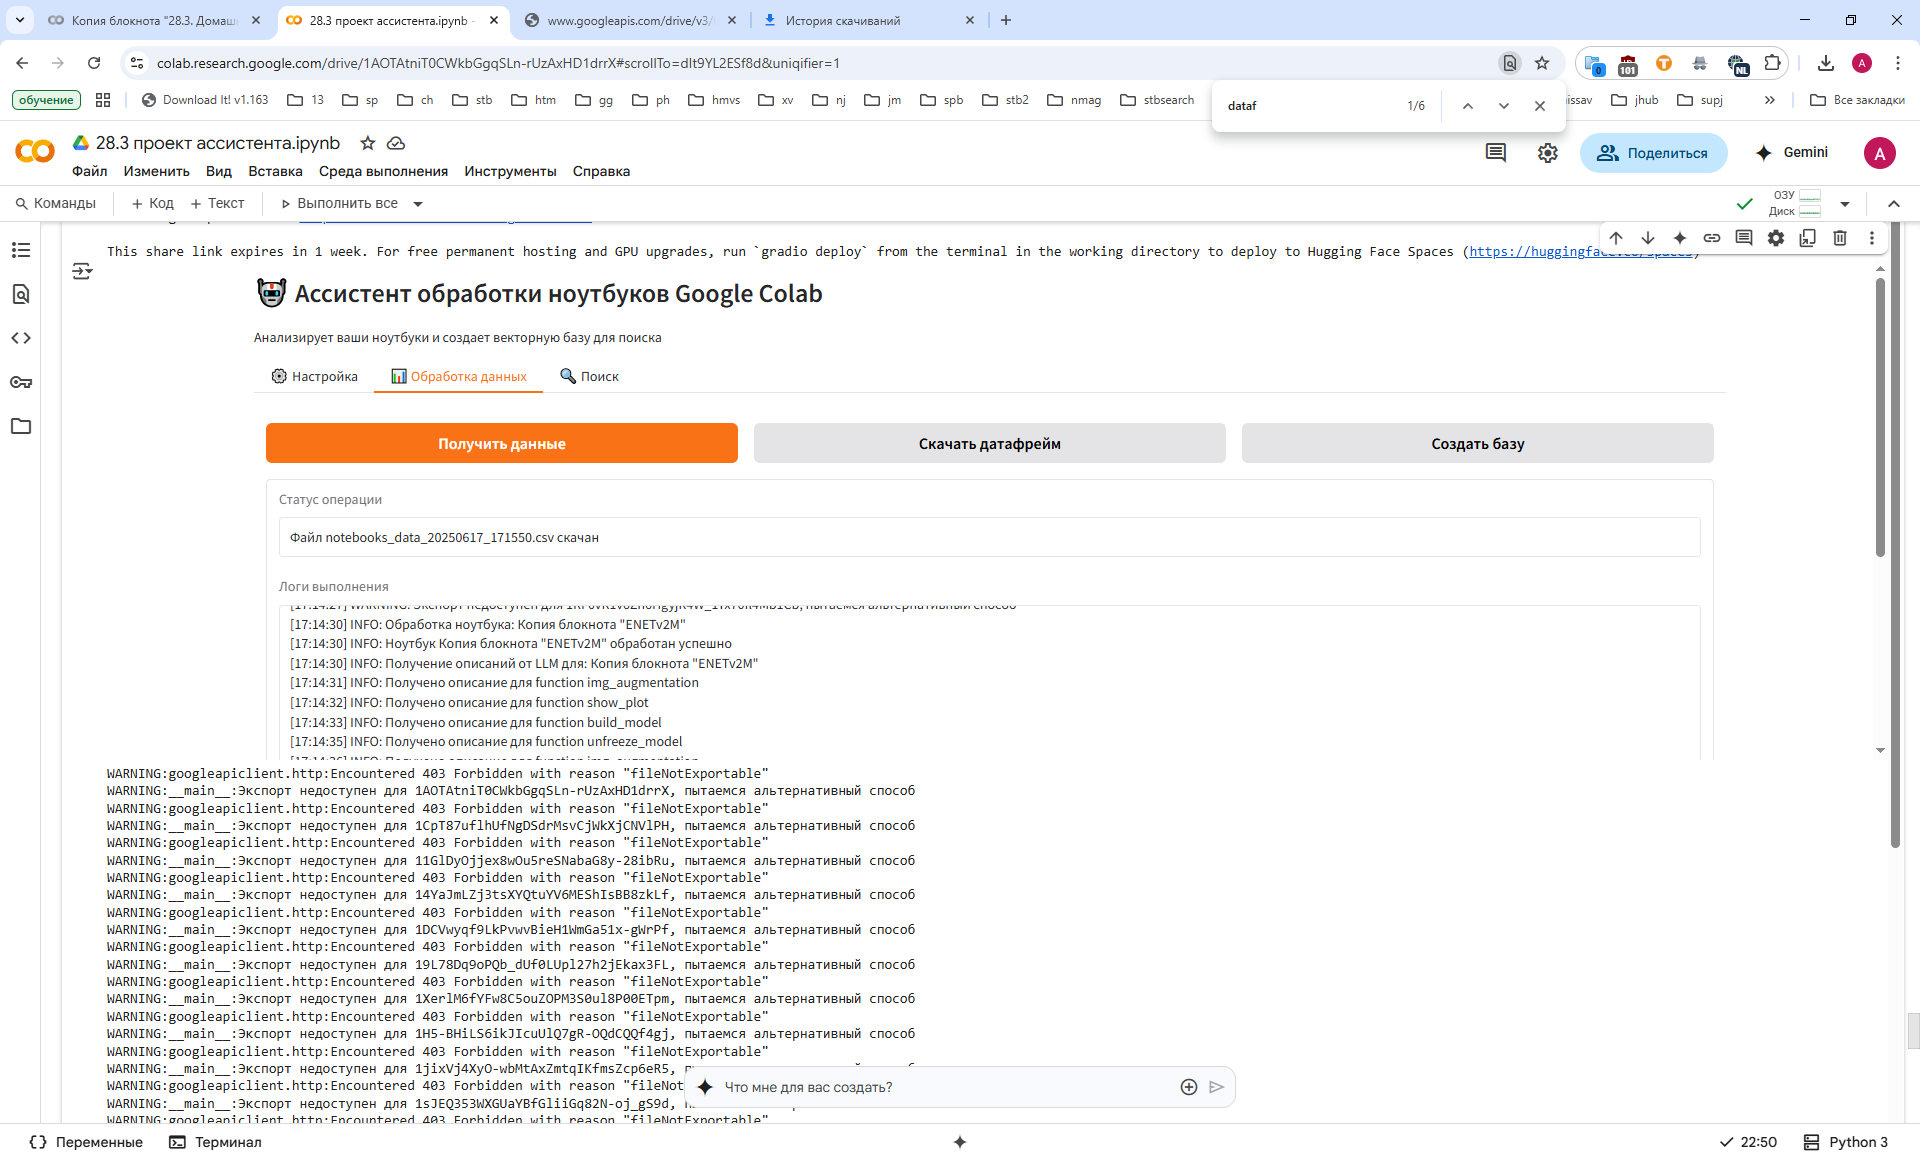

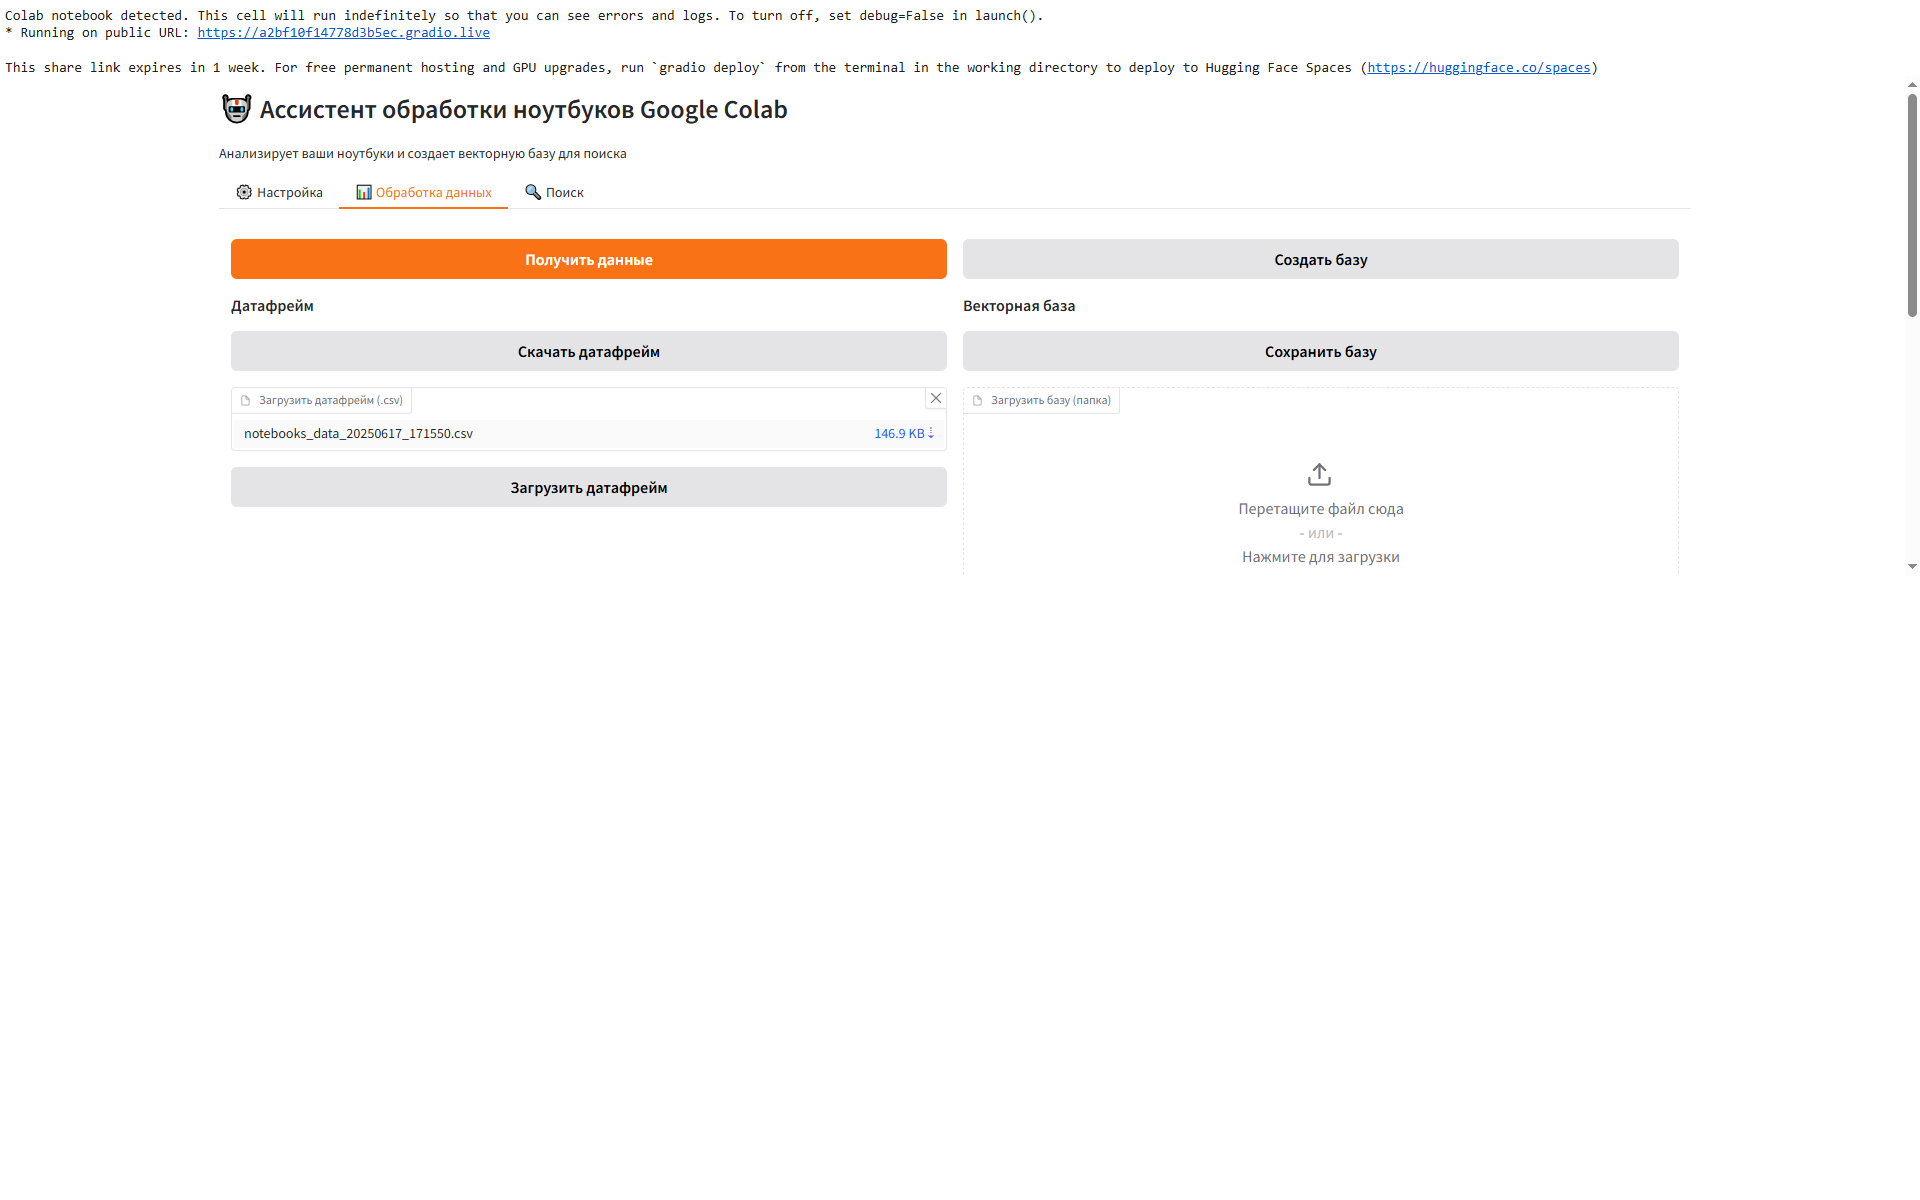

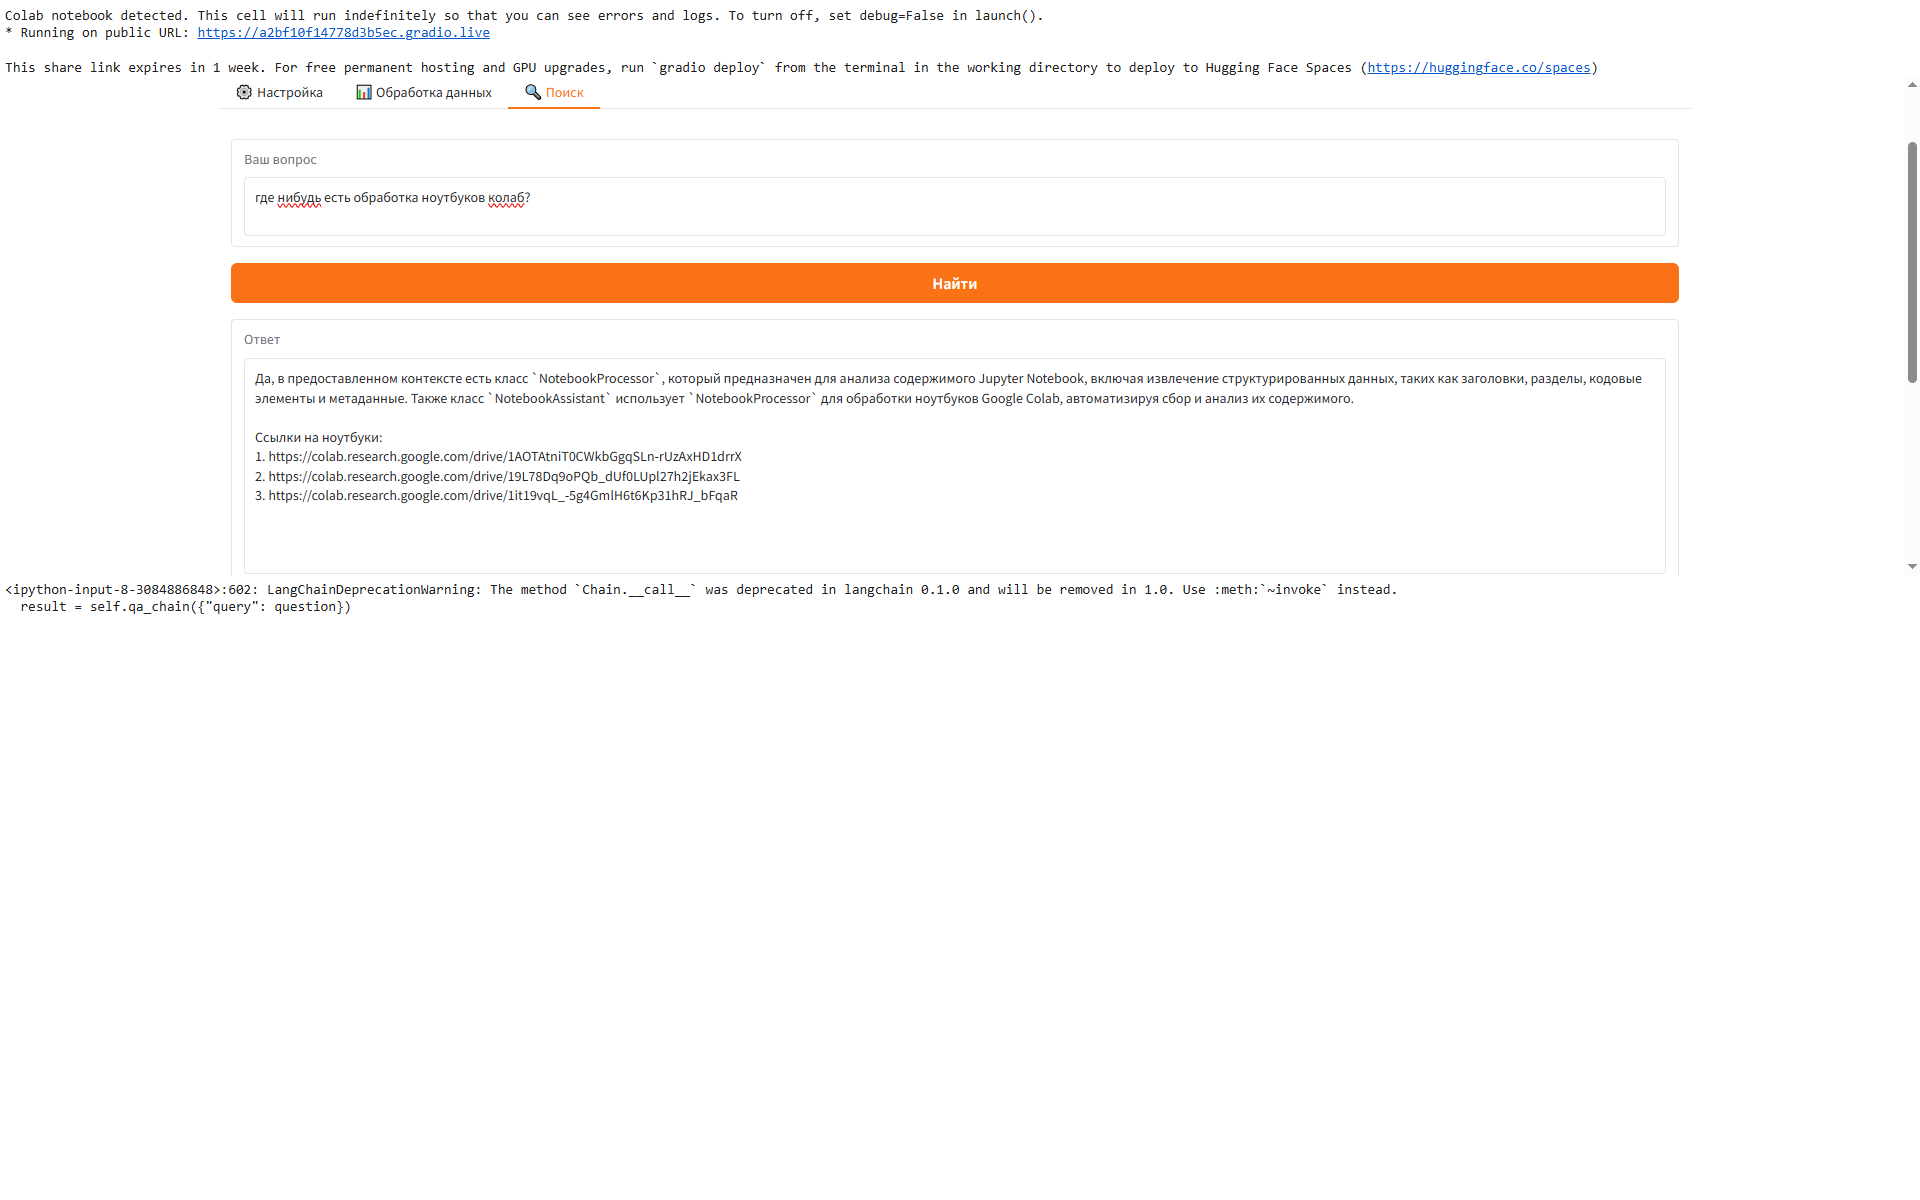

Логи обработки

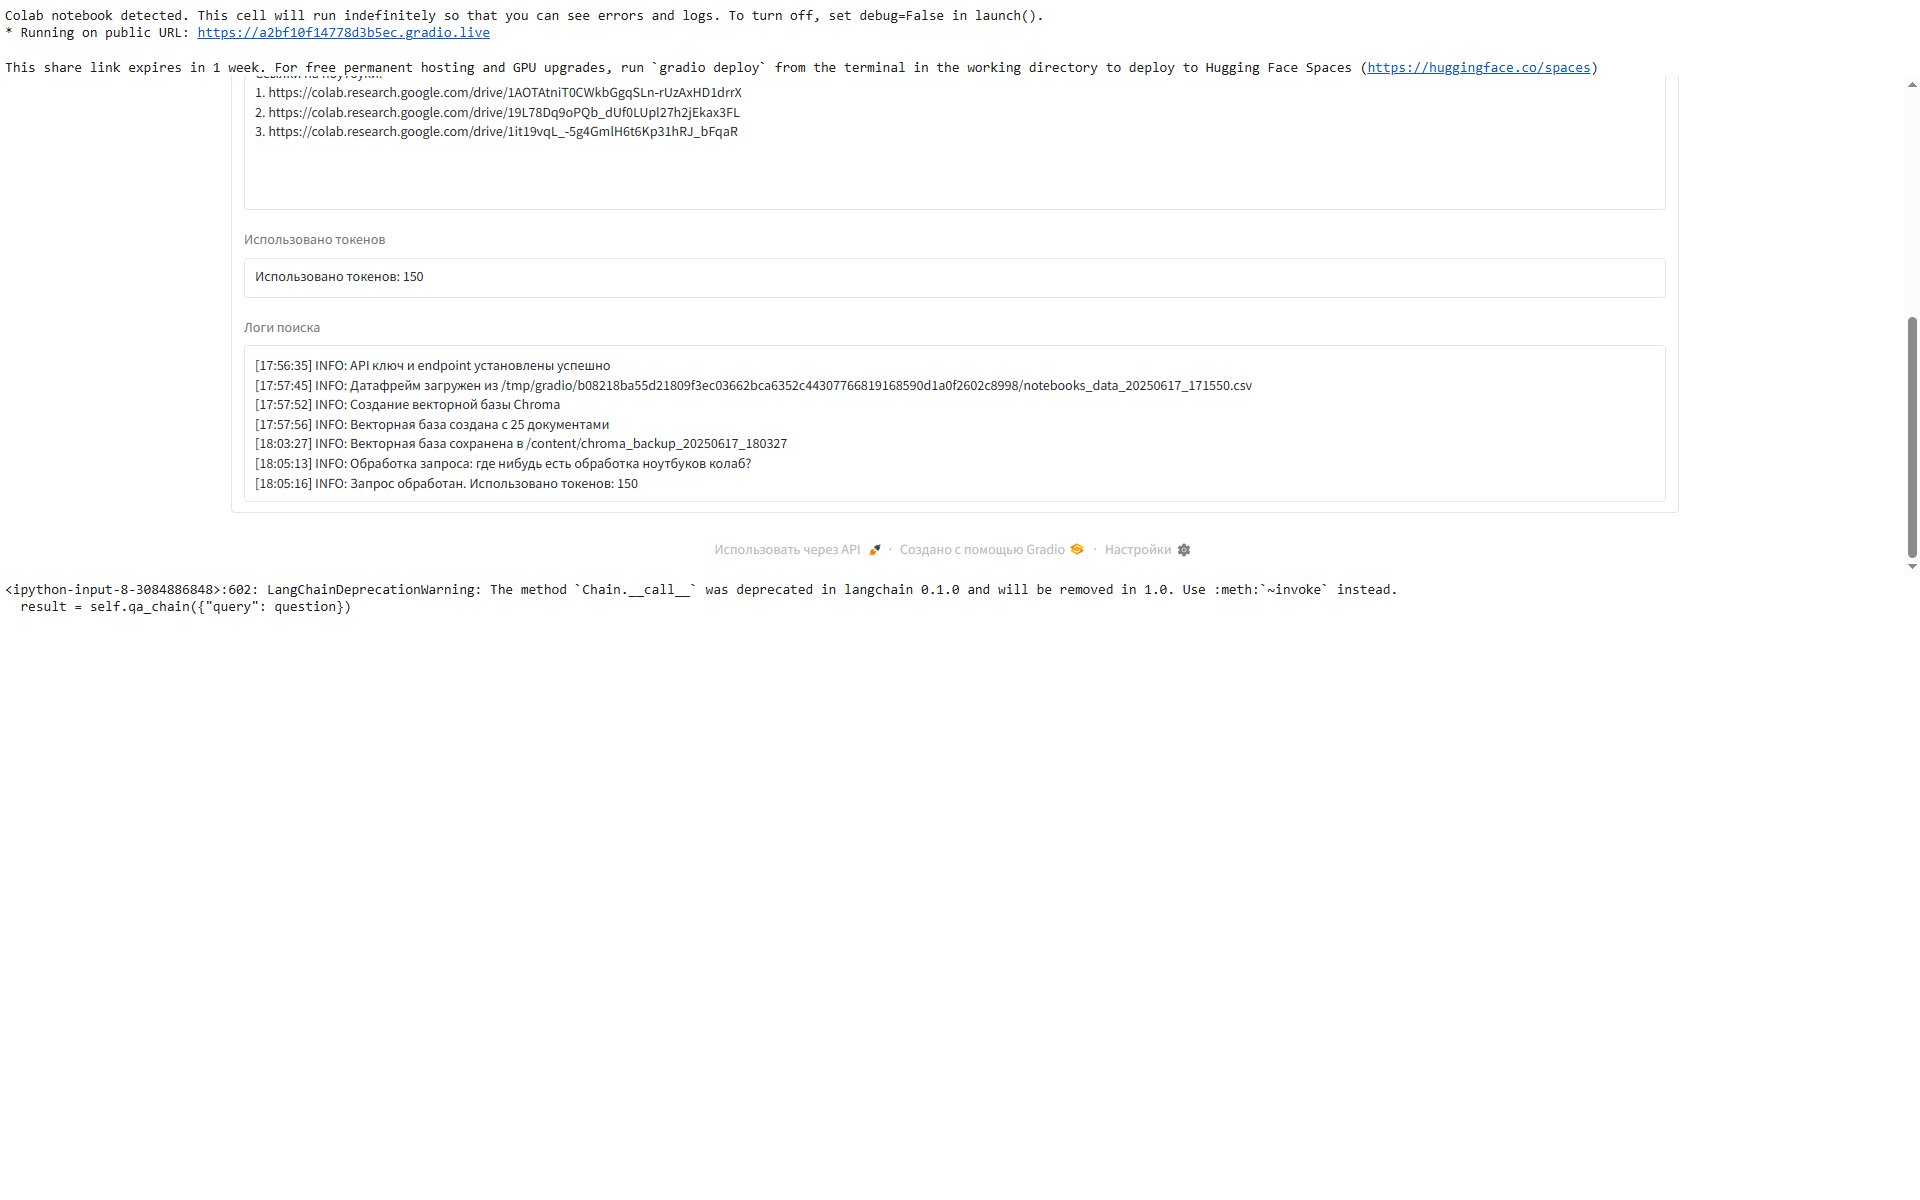

# Итог

Проект доведен до релизной версии, хотя функции, задуманные при формировании ТЗ реализованы не все. Тем не менее ассистент выполняет основную поставленную задачу - обработка ноутбуков и кода, создание датафрейма с итогом обработки и базы для QA поиска с применением обработки запросов и ответов через LLM. Сам проект был задуман для использования в собственных нуждах, но возможно его дальнейшее развитие как коммерческого продукта.